In [74]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/owid-covid-data.csv')

dfv = pd.read_csv(r"CSVs\dfv.csv")
dfv.index = dfv['Unnamed: 0'].values
del dfv['Unnamed: 0']

dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/sraniestarni.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']
dfc['nu'] = 0
dfc['nu'] = dfc.index


In [93]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138722,ZWE,Africa,Zimbabwe,2021-12-04,138523.0,1082.0,669.571,4709.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138723,ZWE,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138724,ZWE,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138725,ZWE,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [94]:
df['date'] = pd.to_datetime(df['date'])

In [95]:
df['nam'] = 0
for i in range(138727):
    df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
for i in range(138727):
    if df['date'].iloc[i].year == 2021:
        df['nam'].iloc[i] = df['nam'].iloc[i]+365

<ipython-input-95-7ee7ee187150>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nam'][i] = (dt.date(2020,df['date'][i].month,df['date'][i].day) - dt.date(2020,1,1)).days
C:\Users\user01\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [96]:
for i in range(138727):
    dfv[df['location'][i]][df['nam'][i]]=df['new_deaths'][i]

In [97]:
dfv1 = dfv.fillna(0)

<function matplotlib.pyplot.show(close=None, block=None)>

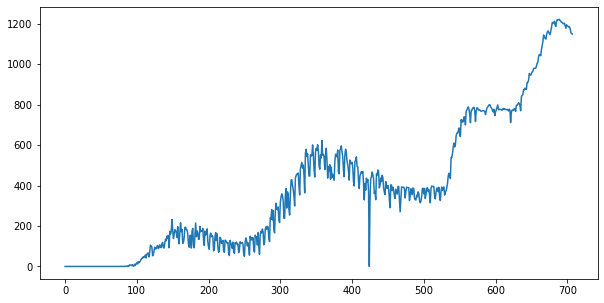

In [98]:
plt.figure(figsize=(10,5))
plt.plot(dfv1.index, dfv1['Russia'])
plt.show

In [109]:
dfv1

,Afghanistan,Africa,Albania,Algeria,Angola,Argentina,Armenia,Asia,Australia,Austria,...,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Zambia,Zimbabwe
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1.0,98.0,1.0,7.0,0.0,4.0,25.0,1080.0,8.0,60.0,...,0.0,127.0,507.0,2199.0,0.0,3.0,9.0,5341.0,0.0,1.0
704,0.0,82.0,1.0,7.0,0.0,3.0,14.0,3996.0,6.0,43.0,...,0.0,54.0,161.0,2281.0,2.0,2.0,7.0,7167.0,0.0,1.0
705,4.0,143.0,5.0,8.0,0.0,34.0,8.0,1238.0,9.0,48.0,...,1.0,46.0,1382.0,2632.0,2.0,3.0,0.0,7022.0,1.0,0.0
706,1.0,128.0,7.0,3.0,0.0,23.0,27.0,1092.0,7.0,77.0,...,0.0,180.0,1609.0,2441.0,1.0,3.0,9.0,8188.0,0.0,3.0


In [100]:
a = dfc.columns
b = dfv1.columns
c = list(set(b) - set(a))
print(c)

['Namibia', 'Marshall Islands', 'Bhutan', 'Guinea', 'Guernsey', 'Turks and Caicos Islands', 'Gibraltar', 'Isle of Man', 'Northern Cyprus', 'Taiwan', 'Nauru', 'Falkland Islands', 'Wallis and Futuna', 'Tokelau', 'Mongolia', 'Cook Islands', 'Comoros', 'Equatorial Guinea', 'Belize', 'Timor', 'Dominica', 'Barbados', 'Turkmenistan', 'Bosnia and Herzegovina', 'Peru', 'Bermuda', 'Sao Tome and Principe', 'Libya', 'Vatican', 'Bonaire Sint Eustatius and Saba', 'Burkina Faso', 'Bahamas', 'San Marino', 'Faeroe Islands', 'Oman', 'New Zealand', 'Sudan', 'Vanuatu', 'Seychelles', 'Yemen', 'Aruba', 'Djibouti', 'Honduras', 'New Caledonia', 'Iceland', 'Antigua and Barbuda', 'Brunei', 'Benin', 'Eritrea', 'Curacao', 'British Virgin Islands', 'Niger', 'Luxembourg', 'Sweden', 'Monaco', 'El Salvador', 'Samoa', 'Haiti', 'Democratic Republic of Congo', 'Uganda', 'Cameroon', 'Ghana', 'South Sudan', 'Switzerland', 'Jersey', 'Tuvalu', 'Central African Republic', 'Sint Maarten (Dutch part)', 'Botswana', 'Saint Helen

In [101]:
for i in c:
    del dfv1[i]

In [85]:
for i in dfv1.columns:
    a = 0
    for h in range(150,708):
        if dfv1[i].iloc[h] == 0:
            if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                    a = a + 1
                    if a > 50:
                        del dfv1[i]
                        break
        

In [86]:
for i in dfv1.columns:
    for h in range(0,708):
        if dfv1[i].iloc[h] == 0:
            if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                if dfv1[i].iloc[h] != dfv1[i].iloc[h-1]:
                    print(i, h)

Africa 0
Africa 68
Africa 70
Africa 75
Africa 424
Albania 0
Albania 71
Albania 78
Albania 84
Albania 88
Albania 91
Albania 95
Albania 98
Albania 100
Albania 107
Albania 113
Albania 117
Albania 119
Albania 121
Albania 145
Albania 147
Albania 158
Albania 164
Albania 173
Albania 190
Albania 267
Albania 365
Albania 424
Albania 511
Albania 517
Albania 524
Albania 528
Albania 532
Albania 539
Albania 543
Albania 575
Albania 585
Albania 587
Albania 600
Albania 642
Albania 675
Albania 690
Algeria 0
Algeria 75
Algeria 82
Algeria 279
Algeria 288
Algeria 307
Algeria 401
Algeria 424
Andorra 82
Andorra 86
Andorra 101
Andorra 103
Andorra 106
Andorra 108
Andorra 111
Andorra 115
Andorra 120
Andorra 124
Andorra 126
Andorra 128
Andorra 130
Andorra 134
Andorra 137
Andorra 168
Andorra 225
Andorra 283
Andorra 286
Andorra 288
Andorra 293
Andorra 295
Andorra 297
Andorra 300
Andorra 304
Andorra 320
Andorra 338
Andorra 340
Andorra 348
Andorra 353
Andorra 355
Andorra 357
Andorra 359
Andorra 364
Andorra 374
Andor

Cuba 662
Cuba 682
Cuba 691
Cuba 694
Cuba 697
Cuba 701
Cuba 707
Czechia 0
Czechia 82
Czechia 86
Czechia 119
Czechia 146
Czechia 149
Czechia 157
Czechia 160
Czechia 172
Czechia 178
Czechia 180
Czechia 182
Czechia 184
Czechia 189
Czechia 191
Czechia 196
Czechia 199
Czechia 201
Czechia 206
Czechia 210
Czechia 220
Czechia 222
Czechia 224
Czechia 234
Czechia 239
Czechia 245
Czechia 341
Czechia 424
Czechia 531
Czechia 537
Czechia 544
Czechia 550
Czechia 555
Czechia 561
Czechia 565
Czechia 569
Czechia 571
Czechia 574
Czechia 576
Czechia 579
Czechia 585
Czechia 590
Czechia 592
Czechia 598
Czechia 600
Czechia 607
Czechia 609
Czechia 613
Czechia 616
Czechia 618
Czechia 636
Czechia 642
Czechia 692
Czechia 698
Djibouti 102
Djibouti 127
Djibouti 136
Djibouti 139
Djibouti 142
Djibouti 146
Djibouti 149
Djibouti 152
Djibouti 155
Djibouti 161
Djibouti 166
Djibouti 171
Djibouti 176
Djibouti 183
Djibouti 191
Djibouti 204
Djibouti 215
Djibouti 234
Djibouti 250
Djibouti 391
Djibouti 396
Djibouti 446
Djibout

Jordan 237
Jordan 239
Jordan 248
Jordan 252
Jordan 258
Jordan 263
Jordan 424
Jordan 494
Jordan 497
Jordan 499
Jordan 504
Jordan 510
Jordan 514
Jordan 565
Jordan 579
Jordan 598
Jordan 604
Jordan 617
Jordan 619
Jordan 621
Jordan 628
Jordan 659
Jordan 683
Jordan 685
Jordan 688
Jordan 702
Kenya 86
Kenya 94
Kenya 97
Kenya 100
Kenya 104
Kenya 107
Kenya 110
Kenya 124
Kenya 128
Kenya 137
Kenya 146
Kenya 240
Kenya 244
Kenya 251
Kenya 259
Kenya 262
Kenya 274
Kenya 301
Kenya 304
Kenya 318
Kenya 367
Kenya 383
Kenya 387
Kenya 389
Kenya 393
Kenya 397
Kenya 401
Kenya 407
Kenya 409
Kenya 424
Kenya 532
Kenya 648
Kenya 659
Kenya 670
Kenya 672
Kenya 674
Kenya 677
Kenya 679
Kenya 682
Kenya 687
Kenya 691
Kenya 694
Kenya 696
Kenya 700
Kenya 707
Kuwait 0
Kuwait 95
Kuwait 105
Kuwait 125
Kuwait 201
Kuwait 225
Kuwait 345
Kuwait 347
Kuwait 350
Kuwait 359
Kuwait 363
Kuwait 367
Kuwait 369
Kuwait 377
Kuwait 380
Kuwait 385
Kuwait 387
Kuwait 391
Kuwait 393
Kuwait 395
Kuwait 401
Kuwait 424
Kuwait 637
Kuwait 642
Kuwait

Paraguay 80
Paraguay 84
Paraguay 96
Paraguay 100
Paraguay 105
Paraguay 112
Paraguay 121
Paraguay 134
Paraguay 168
Paraguay 179
Paraguay 183
Paraguay 186
Paraguay 195
Paraguay 204
Paraguay 214
Paraguay 359
Paraguay 365
Paraguay 424
Paraguay 618
Paraguay 623
Paraguay 625
Paraguay 629
Paraguay 633
Paraguay 639
Paraguay 641
Paraguay 643
Paraguay 645
Paraguay 647
Paraguay 650
Paraguay 654
Paraguay 657
Paraguay 660
Paraguay 667
Paraguay 673
Paraguay 675
Paraguay 678
Paraguay 682
Paraguay 689
Paraguay 696
Paraguay 702
Paraguay 704
Paraguay 707
Peru 66
Peru 68
Peru 72
Peru 75
Peru 424
Peru 519
Peru 522
Peru 528
Peru 530
Peru 532
Peru 535
Peru 538
Peru 542
Peru 545
Peru 548
Peru 555
Peru 576
Peru 593
Peru 600
Peru 605
Peru 608
Peru 625
Peru 638
Peru 642
Peru 659
Peru 671
Peru 678
Peru 705
Peru 707
Philippines 0
Philippines 33
Philippines 76
Philippines 190
Philippines 424
Philippines 569
Philippines 632
Philippines 643
Philippines 666
Philippines 679
Philippines 706
Poland 0
Poland 74
Poland 77

Trinidad and Tobago 227
Trinidad and Tobago 230
Trinidad and Tobago 237
Trinidad and Tobago 241
Trinidad and Tobago 252
Trinidad and Tobago 261
Trinidad and Tobago 264
Trinidad and Tobago 267
Trinidad and Tobago 269
Trinidad and Tobago 274
Trinidad and Tobago 284
Trinidad and Tobago 287
Trinidad and Tobago 290
Trinidad and Tobago 298
Trinidad and Tobago 300
Trinidad and Tobago 302
Trinidad and Tobago 306
Trinidad and Tobago 308
Trinidad and Tobago 310
Trinidad and Tobago 319
Trinidad and Tobago 322
Trinidad and Tobago 326
Trinidad and Tobago 330
Trinidad and Tobago 332
Trinidad and Tobago 334
Trinidad and Tobago 337
Trinidad and Tobago 340
Trinidad and Tobago 349
Trinidad and Tobago 356
Trinidad and Tobago 365
Trinidad and Tobago 374
Trinidad and Tobago 379
Trinidad and Tobago 382
Trinidad and Tobago 385
Trinidad and Tobago 388
Trinidad and Tobago 399
Trinidad and Tobago 405
Trinidad and Tobago 409
Trinidad and Tobago 416
Trinidad and Tobago 433
Trinidad and Tobago 448
Trinidad and Tob

In [87]:
dfv1['Afghanistan'].iloc[133]

KeyError: 'Afghanistan'

In [ ]:
dfd

In [108]:
dfv1.drop(labels = [424],axis = 0,inplace=True)

In [ ]:
dfv1.to_csv('sraniestarni.csv')